In [1]:
#04/26 기말#1
#p.170 #퍼셉트론 구현
import numpy as np

epsilon = 0.0000001

def perceptron(x1, x2):
    w1, w2, b = 1.0, 1.0, -1.5
    sum = x1*w1+x2*w2+b
    
    if sum > epsilon :
        return 1 #합이 엡실론 값(약 0)보다 크면 1로 표시, 작으면 0으로 표시
    else:
        return 0

In [2]:
print(perceptron(0, 0))
print(perceptron(1, 0))
print(perceptron(0, 1))
print(perceptron(1, 1))

0
0
0
1


In [3]:
#넘파이 사용
import numpy as np
epsilon = 0.0000001

def perceptron(x1, x2):
    X = np.array([x1, x2])
    W = np.array([1.0, 1.0])
    B = -1.5
    
    sum = np.dot(W, X)+B
    
    if sum > epsilon:
        return 1
    else:
        return 0

#4개 데이터
print(perceptron(0, 0))
print(perceptron(1, 0))
print(perceptron(0, 1))
print(perceptron(1, 1))

0
0
0
1


In [2]:
import numpy as np

epsilon = 0.0000001

def step_func(t):
    if t > epsilon: return 1
    else: return 0
    
X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])

y = np.array([0, 0, 0, 1])
W = np.zeros(len(X[0]))

def perceptron_fit(X, Y, epochs=10):
    global W
    eta = 0.2
    
    for t in range(epochs): #epoch 값 반복
        print("epoch=", t, "======================")
        for i in range(len(X)):
            predict = step_func(np.dot(X[i], W))
            error = Y[i] - predict
            W += eta * error * X[i]
            print("현재 처리 입력=", X[i], "정답=", Y[i],"출력=", predict, "변경된 가중치=", W)
        print("==============================")
        
def perceptron_predict(X, Y):
        global W
        for x in X:
            print(x[0], x[1], "→", step_func(np.dot(x, W)))
            
perceptron_fit(X, y, 6)
perceptron_predict(X, y)

#(epoch = 0) 4번째 출력 값 → 오류

epoch= 0 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [0 1 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [1 0 1] 정답= 0 출력= 0 변경된 가중치= [0. 0. 0.]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [0.2 0.2 0.2]
epoch= 1 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 1 변경된 가중치= [0.2 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.  -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 0 변경된 가중치= [ 0.2  0.  -0.2]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [0.4 0.2 0. ]
epoch= 2 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [0.4 0.2 0. ]
현재 처리 입력= [0 1 1] 정답= 0 출력= 1 변경된 가중치= [ 0.4  0.  -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.  -0.4]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
epoch= 3 ======================
현재 처리 입력= [0 0 1] 정답= 0 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
현재 처리 입력= [0 1 1] 정답= 0 출력= 0 변경된 가중치= [ 0.4  0.2 -0.2]
현재 처리 입력= [1 0 1] 정답= 0 출력= 1 변경된 가중치= [ 0.2  0.2 -0.4]
현재 처리 입력= [1 1 1] 정답= 1 출력= 0 변경된 가중치= [ 0.4  0.4 -0.2]
epoch=

In [5]:
#sklearn
#p.177
from sklearn.linear_model import Perceptron

X = [[0,0],[0,1],[1,0],[1,1]]
y = [0,0,0,1]

clf = Perceptron(tol=1e-3, random_state=0)

clf.fit(X,y)

print(clf.predict(X))

[0 0 0 1]


1.0


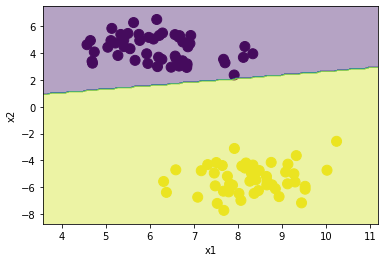

In [8]:
#p.178
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
import numpy as np

clf = Perceptron(tol=1e-3, random_state=0)

X, y = make_blobs(n_samples=100, centers=2)
clf.fit(X,y)

from sklearn.metrics import accuracy_score
print(accuracy_score(clf.predict(X), y))

plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.xlabel("x1")
plt.ylabel("x2")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

In [1]:
#작동, 학습, 한계점
#인공 신경망(ANN) → 생물학적인 신경망
#덴드라이트: 입력 신호(input) → 트랜지스터
#트랜지스터(컴퓨터) vs 뉴런(두뇌)
#학습 기능: O vs X // 순차적인 처리, 병렬 처리
#신경망: 학습 가능 & 오동작해도 큰 문제 없음 → 이미지 인식

#퍼셉트론(1957, 로젠블라트): 인공 신경망 → 입력(x) * 가중치(w) + 바이어스(b) → 활성화 함수(function)
#입력 * 가중치 = S → 출력값(y): (S < 0) 0, (S ≥ 0) 1

#함수로 표현하는 방법
#1) 수식, 2) 표, 3) 그래프. 4) 퍼셉트론(신경망)
#논리 곱(AND)
#계단 함수

#학습 데이터 m개 → w, b 출력
#초기화 → 랜덤, 정수
#가중치 변경X까지 반복

#♨ 기말 #1 58:00 → 공식

#학습률: 0.001

#한계점